# 逻辑回归-线性可分 

## 案例：根据两门学生成绩，预测该学生是否能被大学录取

### 数据集 ex2data1.tst 

In [1]:
import pandas as pd
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='dark', color_codes=False)  # 绘图风格设置
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
data=pd.read_csv('ex2data1.txt',engine='python',names=['Exam1','Exam2','Accepted'])#读取文件 
#相对路径必须要加.txt后缀，血泪教训#
data.head()# 读取前五行数据

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 数据可视化 

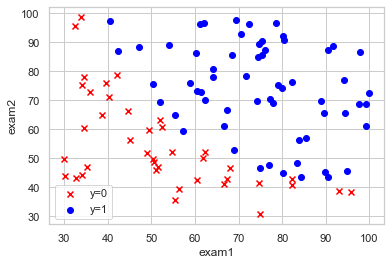

In [3]:
fig,ax = plt.subplots() #数据可视化
# c--散点颜色，marker--散点形状，label--散点标签
# data['Accepted']==0--判断接受值，['Exam1']--选择符合前面接收值的所有测试值
# data[data['Accepted']==0]['Exam1']表示在接受值为0时，所有exam1的符合值的横坐标
# data[data['Accepted']==0]['Exam2']表示在接受值为0时，所有exam2的符合值的纵坐标
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c='b',marker='o',label='y=1')
ax.legend()#两个标签同时显示

ax.set(xlabel='exam1',ylabel='exam2')
plt.show()

### 构造数据集 

In [4]:
def get_Xy(data):
    data.insert(0,'ones',1)#为保证矩阵维度，在最开始插入一列全1
    X_=data.iloc[:,0:-1]#切片取第一列到倒数第二列构建数据集X
    X=X_.values#将DataFrame格式转换为数组
    
    y_=data.iloc[:,-1]#切片取倒数第二列到倒数第一列构建标签y
    y=y_.values.reshape(len(y_),1)#将DataFrame格式的y转化为二维数组，便于后续运算
    
    return X,y

In [5]:
X,y=get_Xy(data)

In [6]:
X.shape#检查维度

(100, 3)

In [7]:
y.shape

(100, 1)

### 构造损失函数 

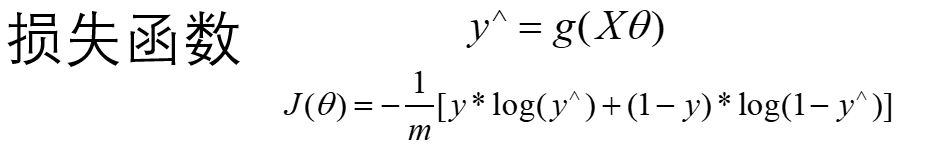

In [8]:
def sigmoid(z):#构造激活函数
    return 1/(1+np.exp(-z))

In [9]:
def costFunction(X,y,theta):#构造损失函数
    A=sigmoid(X @ theta) #y^
    
    first= y * np.log(A)
    second= (1-y) * np.log(1-A)
    
    return -np.sum(first + second)/ len(X)#此处first+second结果是向量的形式，为返回一个值，需要对其进行累加求和,m=len(X)

In [10]:
theta = np.zeros((3,1))#创建（3，1）全0矩阵，保证X @ theta与y的维度相同
theta.shape

(3, 1)

In [11]:
cost_init=costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


### 构造梯度下降函数 

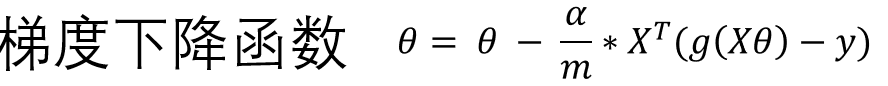

In [12]:
def gradientDescent(X,y,theta,alpha,iters):#梯度降落函数
    m=len(X)
    costs=[] #建立cost元组获取每次迭代时J（theta）的参数
    
    for i in range(iters):
        A=sigmoid(X @ theta)
        theta = theta - (alpha / m) * (X.T @ (A - y)) #X.T--X的转置，
        cost = costFunction(X,y,theta) #调用costFunction函数获取每次迭代时J（theta）的值
        costs.append(cost) #append函数会在数组后加上相应的元素,costs组存cost的值
        
        if i% 100 ==0:# 每迭代100次打印一个值
            print(cost)
            
    return costs,theta

In [13]:
alpha=0.0004#学习率
iters=200000 #迭代次数

In [14]:
costs,final_theta=gradientDescent(X,y,theta,alpha,iters)

0.6328076108896458
0.6296269268276102
0.6294293150207276
0.6292345814780739
0.6290399862671202
0.6288455252130731
0.6286511982206959
0.6284570052008494
0.6282629460644124
0.6280690207222734
0.6278752290853313
0.6276815710644943
0.6274880465706812
0.6272946555148207
0.6271013978078521
0.6269082733607252
0.6267152820844001
0.626522423889848
0.6263296986880512
0.6261371063900024
0.625944646906706
0.6257523201491775
0.6255601260284438
0.6253680644555434
0.6251761353415266
0.6249843385974554
0.6247926741344038
0.6246011418634579
0.6244097416957158
0.6242184735422883
0.6240273373142985
0.623836332922882
0.6236454602791872
0.6234547192943757
0.6232641098796214
0.6230736319461121
0.6228832854050479
0.6226930701676434
0.6225029861451257
0.6223130332487362
0.6221232113897296
0.6219335204793748
0.6217439604289546
0.6215545311497658
0.6213652325531197
0.6211760645503418
0.6209870270527722
0.6207981199717656
0.6206093432186915
0.6204206967049342
0.6202321803418928
0.6200437940409822
0.6198555377136

0.5507861558947432
0.5506453613915546
0.5505046618331167
0.5503640571452596
0.5502235472538581
0.550083132084833
0.5499428115641496
0.5498025856178187
0.5496624541718963
0.549522417152484
0.5493824744857284
0.5492426260978214
0.5491028719150003
0.5489632118635482
0.5488236458697933
0.5486841738601088
0.5485447957609142
0.5484055114986736
0.5482663209998972
0.5481272241911408
0.547988220999005
0.5478493113501368
0.5477104951712284
0.5475717723890173
0.5474331429302874
0.5472946067218674
0.5471561636906324
0.5470178137635023
0.5468795568674437
0.5467413929294684
0.5466033218766341
0.5464653436360437
0.5463274581348468
0.5461896653002383
0.5460519650594587
0.5459143573397951
0.5457768420685796
0.5456394191731904
0.545502088581052
0.5453648502196348
0.5452277040164544
0.5450906498990732
0.544953687795099
0.5448168176321859
0.5446800393380338
0.544543352840389
0.5444067580670434
0.544270254945835
0.5441338434046482
0.543997523371413
0.5438612947741062
0.54372515754075
0.5435891115994131
0.5

0.4846349459569502
0.4845371822357848
0.4844394790546589
0.4843418363648992
0.4842442541178725
0.484146732264987
0.4840492707576922
0.48395186954747843
0.4838545285858769
0.48375724782446
0.48366002721484086
0.48356286670867404
0.48346576625765436
0.48336872581351764
0.48327174532804074
0.48317482475304174
0.4830779640403788
0.4829811631419514
0.48288442200969894
0.48278774059560287
0.482691118851684
0.48259455673000495
0.48249805418266833
0.48240161116181723
0.482305227619636
0.482208903508349
0.4821126387802216
0.48201643338755923
0.48192028728270836
0.48182420041805535
0.48172817274602736
0.4816322042190919
0.48153629478975707
0.48144044441057127
0.48134465303412277
0.48124892061304086
0.4811532470999947
0.4810576324476939
0.4809620766088882
0.48086657953636747
0.4807711411829624
0.48067576150154295
0.48058044044502
0.48048517796634416
0.48038997401850625
0.480294828554537
0.4801997415275073
0.4801047128905281
0.4800097425967506
0.4799148305993654
0.4798199768516036
0.47972518130673

0.44283418992086465
0.4427611630099715
0.44268817707745794
0.44261523209176007
0.44254232802134075
0.4424694648346918
0.44239664250033306
0.44232386098681203
0.44225112026270486
0.44217842029661564
0.44210576105717614
0.4420331425130463
0.4419605646329141
0.4418880273854955
0.4418155307395344
0.44174307466380225
0.44167065912709885
0.44159828409825175
0.44152594954611607
0.4414536554395751
0.4413814017475394
0.4413091884389481
0.4412370154827671
0.44116488284799077
0.44109279050364053
0.44102073841876616
0.4409487265624445
0.44087675490378003
0.4408048234119054
0.44073293205597996
0.4406610808051913
0.4405892696287541
0.4405174984959109
0.4404457673759314
0.44037407623811264
0.44030242505177936
0.44023081378628376
0.440159242411005
0.4400877108953498
0.44001621920875267
0.4399447673206744
0.4398733552006037
0.4398019828180565
0.4397306501425758
0.43965935714373194
0.4395881037911223
0.43951689005437167
0.4394457159031315
0.4393745813070807
0.43930348623592486
0.43923243065939743
0.4391

0.41385200880346806
0.41379453093405055
0.4137370824005158
0.4136796631816491
0.41362227325625445
0.4135649126031543
0.41350758120118924
0.4134502790292192
0.4133930060661221
0.4133357622907947
0.4132785476821523
0.4132213622191286
0.4131642058806759
0.41310707864576485
0.4130499804933848
0.41299291140254324
0.4129358713522662
0.4128788603215984
0.4128218782896028
0.41276492523536
0.41270800113797007
0.412651105976551


In [15]:
final_theta

array([[-4.10226208],
       [ 0.03995533],
       [ 0.03261012]])

In [16]:
def predict(X,theta): #构建可能性计算函数
    
    prob = sigmoid(X@theta)
    
    return [1 if x >= 0.5 else 0 for x in prob]

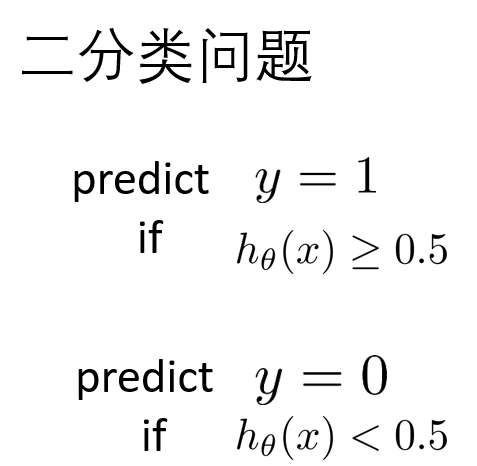

In [17]:
y_ = np.array(predict(X,final_theta))
y_pre = y_.reshape(len(y_),1)

acc  = np.mean(y_pre == y)

print(acc)

0.88


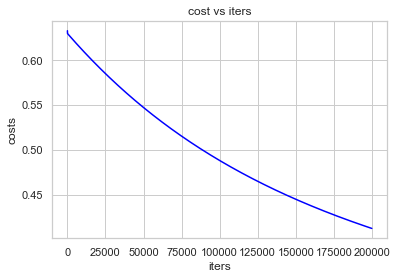

In [18]:
fig,ax = plt.subplots() #损失函数迭代可视化
ax.plot(np.arange(iters),costs,'b')   #列表
ax.set(xlabel='iters',ylabel='costs',title='cost vs iters')
plt.show()

### 决策边界 

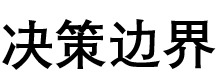
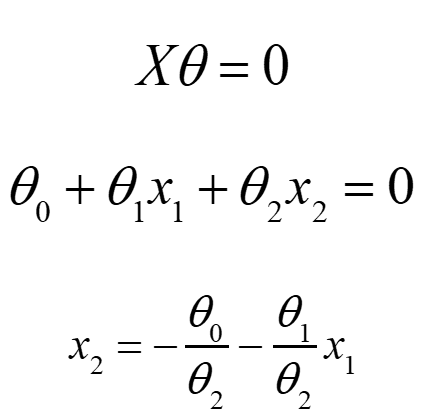

In [19]:
coef1 = -theta[0,0]/theta[2,0] #theta[0,0]--theta0,theta[1,0]--theta1,theta[2,0]--theta2
coef2 = -theta[1,0]/theta[2,0]

<ipython-input-19-56d5c31ad595>:1: RuntimeWarning: invalid value encountered in double_scalars
  coef1 = -theta[0,0]/theta[2,0] #theta[0,0]--theta0,theta[1,0]--theta1,theta[2,0]--theta2
<ipython-input-19-56d5c31ad595>:2: RuntimeWarning: invalid value encountered in double_scalars
  coef2 = -theta[1,0]/theta[2,0]


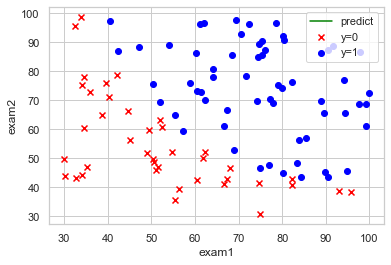

In [20]:
x = np.linspace(20,100,100) #取从20到100的100个点
f = coef1 + coef2 * x

fig,ax = plt.subplots() #数据可视化
# c--散点颜色，marker--散点形状，label--散点标签
# data['Accepted']==0--判断接受值，['Exam1']--选择符合前面接收值的所有测试值
# data[data['Accepted']==0]['Exam1']表示在接受值为0时，所有exam1的符合值的横坐标
# data[data['Accepted']==0]['Exam2']表示在接受值为0时，所有exam2的符合值的纵坐标
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c='b',marker='o',label='y=1')


ax.set(xlabel='exam1',ylabel='exam2')
ax.plot(x,f,c='g',label='predict')

ax.legend()#多个标签同时显示
plt.show()